 # Womens E-Commerce Clothing Reviews

Hi there! In this exercise, we will first go through the dataset - explorate the data and gain insights. The next task will be sentiment analysis with LSTM. It will be a simple binary classification, whether the customer review is positive(recommend) or negative(not recommend). The final task will be a recommendation system. 

Let's start! 

# Data Explanation

Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

- Age: Positive Integer variable of the reviewers age.

- Title: String variable for the title of the review.

- Review Text: String variable for the review body.

- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

- Division Name: Categorical name of the product high level division.

- Department Name: Categorical name of the product department name.

- Class Name: Categorical name of the product class name.

In [55]:
! pwd

/content/drive/MyDrive/딥러닝


In [56]:
%cd './drive/MyDrive/딥러닝'

[Errno 2] No such file or directory: './drive/MyDrive/딥러닝'
/content/drive/MyDrive/딥러닝


# Data Upload

In [115]:
import pandas as pd 

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0 )

In [116]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [60]:
for dtype, cols in df.groupby(by=df.dtypes, axis=1):
  print(dtype)
  for col in list(cols):
    print(f'unique value of column "{col}" : ', df[col].nunique())
  print('---')

int64
unique value of column "Clothing ID" :  1206
unique value of column "Age" :  77
unique value of column "Rating" :  5
unique value of column "Recommended IND" :  2
unique value of column "Positive Feedback Count" :  82
---
object
unique value of column "Title" :  13993
unique value of column "Review Text" :  22634
unique value of column "Division Name" :  3
unique value of column "Department Name" :  6
unique value of column "Class Name" :  20
---


# Top 20 recommended Item 

In [61]:
top20_df = pd.pivot_table(df, 
                 index= ['Clothing ID','Class Name' ],
                 columns= 'Recommended IND'  ,
                 values=  'Title'   ,
                 aggfunc=  'count'   ).sort_values(by=[1],ascending=False)[:20]

top20_df['ratio'] = round(top20_df[1]/(top20_df[0]+top20_df[1])*100,2)
top20_df

Recommended IND             0      1  ratio
Clothing ID Class Name                     
1078        Dresses     164.0  707.0  81.17
862         Knits       124.0  534.0  81.16
1094        Dresses     118.0  533.0  81.87
1081        Dresses      72.0  415.0  85.22
872         Knits        64.0  386.0  85.78
829         Blouses      79.0  373.0  82.52
1110        Dresses      74.0  345.0  82.34
895         Fine gauge   56.0  280.0  83.33
868         Knits        96.0  274.0  74.05
850         Blouses      38.0  242.0  86.43
936         Sweaters     52.0  237.0  82.01
867         Knits        56.0  235.0  80.76
1095        Dresses      62.0  225.0  78.40
863         Knits        40.0  203.0  83.54
1059        Pants        46.0  201.0  81.38
1080        Dresses      41.0  200.0  82.99
1077        Dresses      52.0  199.0  79.28
1086        Dresses      43.0  198.0  82.16
860         Knits        51.0  186.0  78.48
1083        Dresses      34.0  180.0  84.11

These are the top 20 recommended items. Most of the recommended items are dresses! It seems that this website sell many different kinds of dresses.

# String features

In [62]:
for col in df.select_dtypes('object').columns:
  print(col,' : ' ,df[col].unique(),'\n')

Title  :  [nan 'Some major design flaws' 'My favorite buy!' ...
 'Cute, but see through'
 'Very cute dress, perfect for summer parties and we'
 'Please make more like this one!'] 

Review Text  :  ['Absolutely wonderful - silky and sexy and comfortable'
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major desi


Let's look at some bar charts to gain insights regarding recommendations and ratings.

### Bar chart - Recommended IND

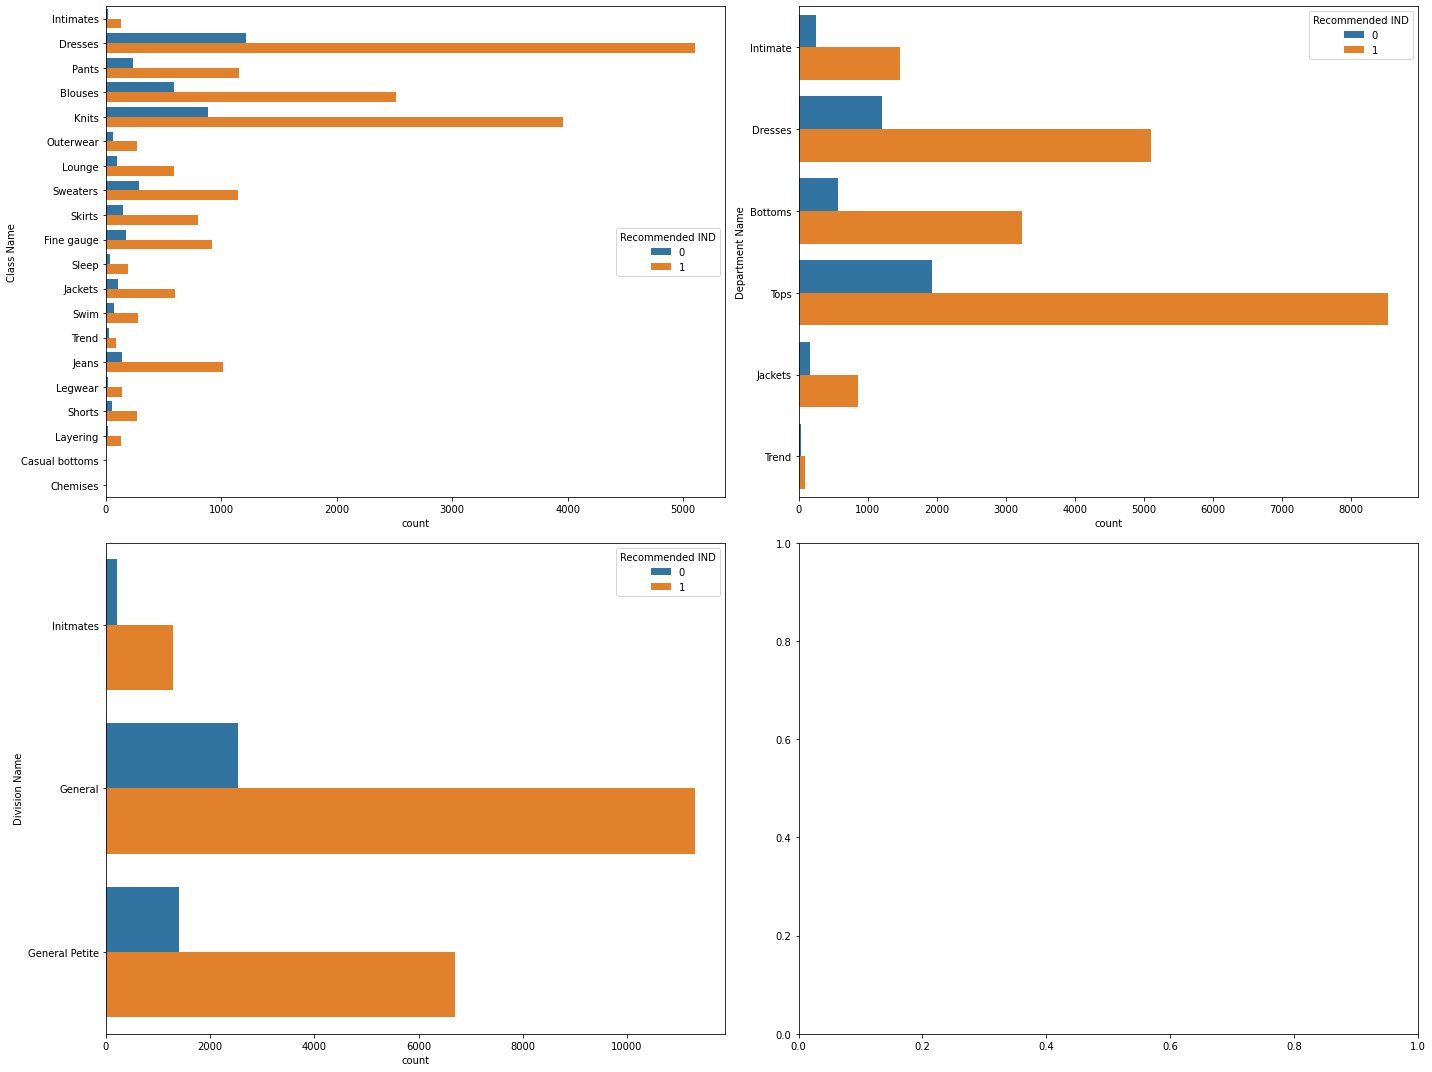

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, df[['Class Name','Department Name','Division Name']]):
    sns.countplot(y=col, hue='Recommended IND', data=df, ax=ax)
plt.tight_layout()
plt.show()

### Bar chart - Rating

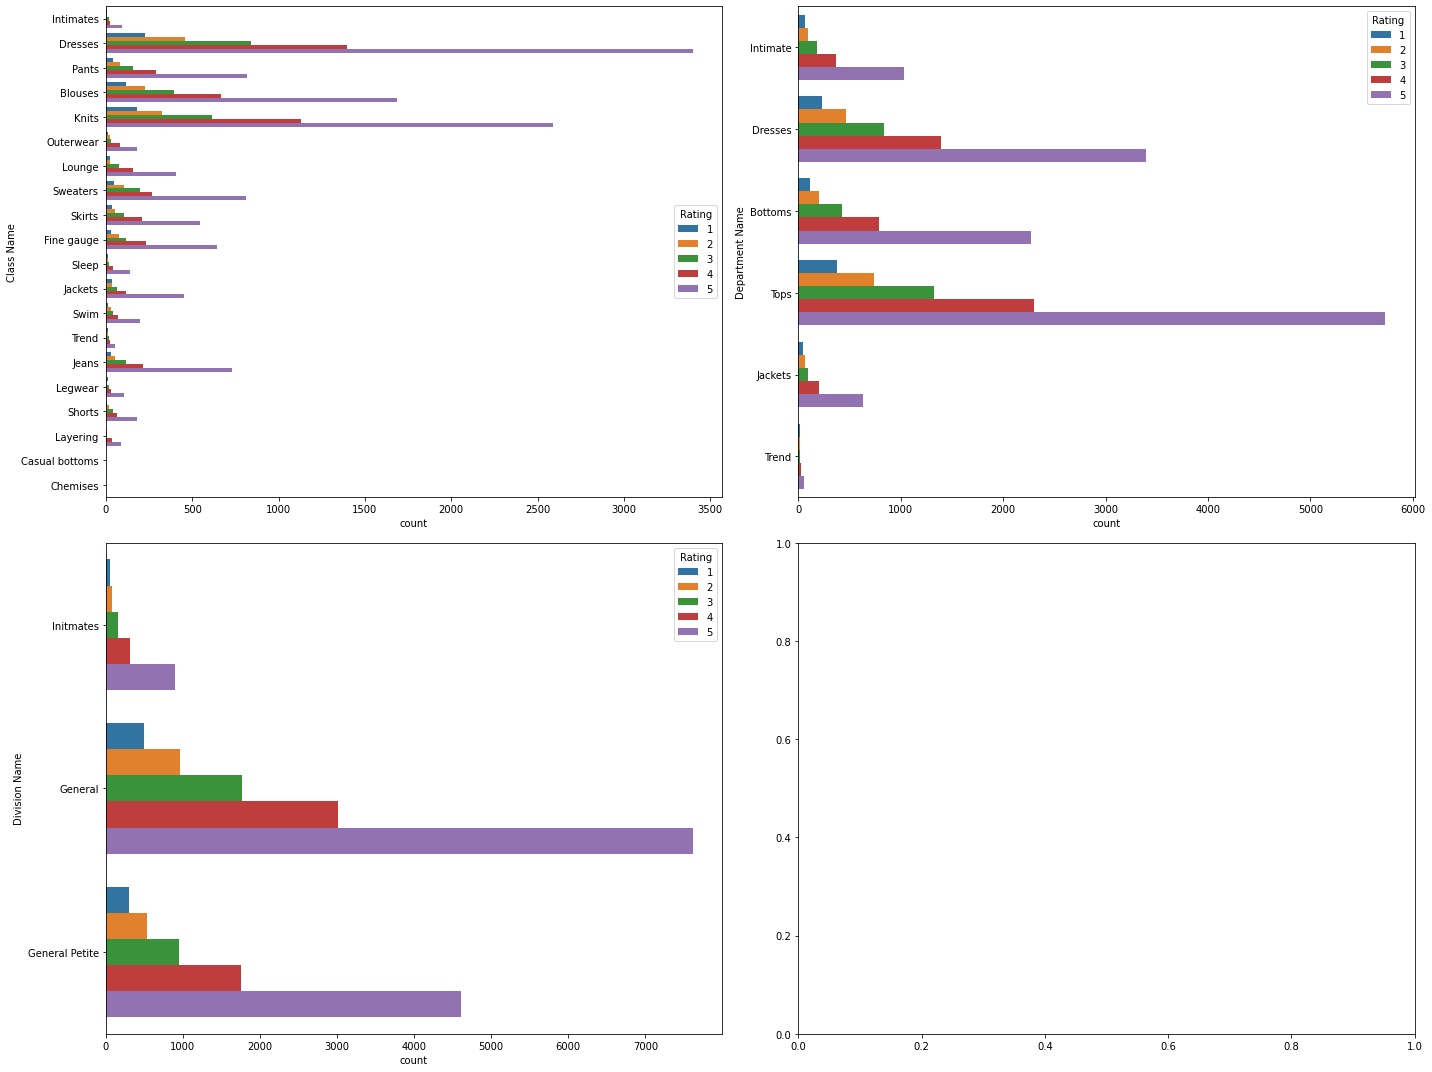

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, df[['Class Name','Department Name','Division Name']]):
    sns.countplot(y=col, hue='Rating', data=df, ax=ax)
plt.tight_layout()
plt.show()

### Average number of words

In [65]:
df["Review Text"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).mean()

11.456342824256588

In [66]:
df["Title"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).mean()

2.8381057337403672

### Max number of words 

In [67]:
df["Review Text"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).max()

103.0

In [68]:
df["Title"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).max()

12.0

## Rating

In [69]:
cnts = list(df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count())

In [70]:
x_val = df.Rating.unique()
x_val.sort()

x_values = list()
for i,x in enumerate(x_val):
  x1 = str(x)+'_0'
  x_values.append(x1)
  x2 = str(x)+'_1'
  x_values.append(x2)

In [71]:
#! pip install matplotlib --upgrade

[Text(0, 15, '826'),
 Text(0, 15, '16'),
 Text(0, 15, '1471'),
 Text(0, 15, '94'),
 Text(0, 15, '1682'),
 Text(0, 15, '1189'),
 Text(0, 15, '168'),
 Text(0, 15, '4909'),
 Text(0, 15, '25'),
 Text(0, 15, '13106')]

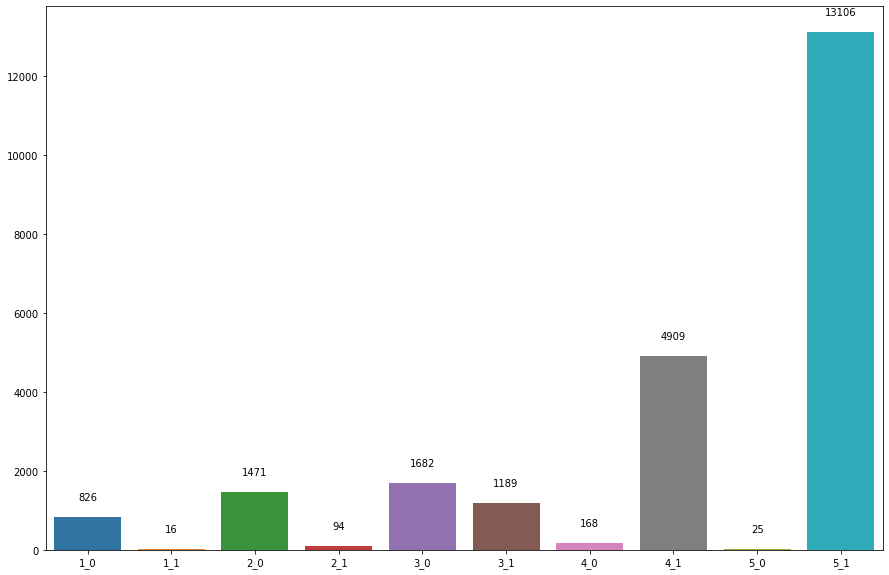

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
barchart = sns.barplot(x=x_values, y=cnts, ax=ax)


barchart.bar_label(ax.containers[0], label_type='edge', padding=15)

In [73]:
for i in range(1,6):
  print('Sample review for the rating: ', i)
  print(list(df[df['Rating']==i]['Review Text'])[0])
  print('')

Sample review for the rating:  1
3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!

Sample review for the rating:  2
I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just di

## Wordcloud

### Review Text

In [74]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

ratings_adj = list()

for i in range(1,6):

  for j in range(2):
    count_words = dict()
    for review in df[(df['Rating']==i)&(df['Recommended IND']==j)]['Review Text']:
      review = nltk.word_tokenize(str(review))
      pos_tagged = nltk.pos_tag(review)
      words = filter(lambda x:x[1] in ('JJ','JJR','JJS') ,pos_tagged)
      for word in words:
        word = word[0]
        if word in count_words:
          count_words[word]+=1
        else:
          count_words[word] = 1

    ratings_adj.append(count_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [75]:
df[df['Review Text'].str.contains('little',na=False)]['Review Text'][:10]

1     Love this dress!  it's sooo pretty.  i happene...
6     I aded this in my basket at hte last mintue to...
8     I love this dress. i usually get an xs but it ...
20    If this product was in petite, i would get the...
21    I'm upset because for the price of the dress, ...
23    Cute little dress fits tts. it is a little hig...
29    This sweater is so comfy and classic - it bala...
38    Super cute and comfy pull over. sizing is accu...
44    Tried this on today at my local retailer and h...
45    I bought this item from online... the fit on t...
Name: Review Text, dtype: object

Wordcloud for the Rating and Recommended IND:  1_0


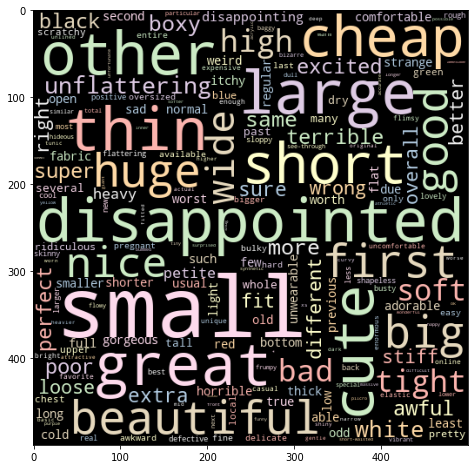

Wordcloud for the Rating and Recommended IND:  1_1


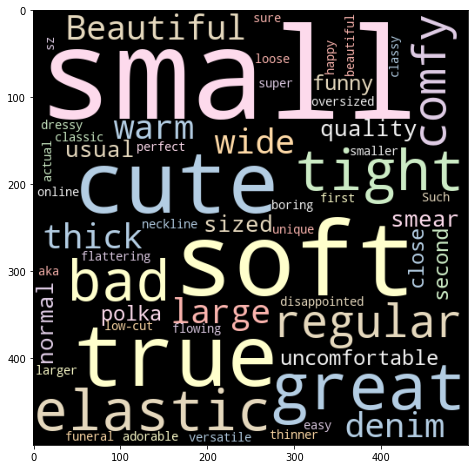

Wordcloud for the Rating and Recommended IND:  2_0


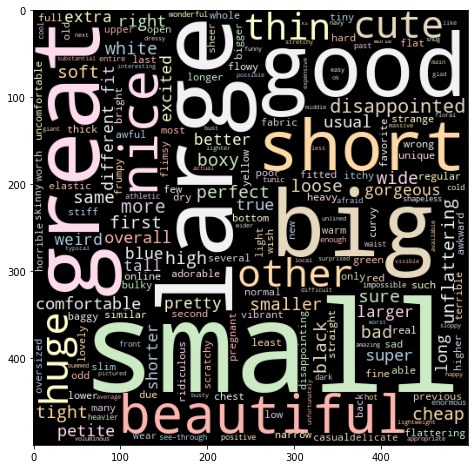

Wordcloud for the Rating and Recommended IND:  2_1


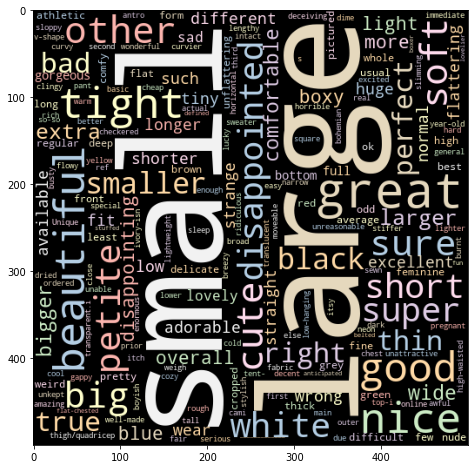

Wordcloud for the Rating and Recommended IND:  3_0


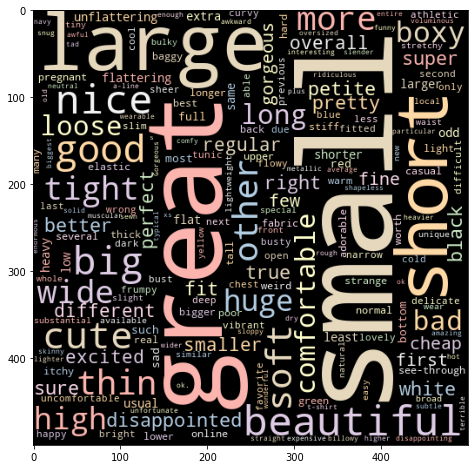

Wordcloud for the Rating and Recommended IND:  3_1


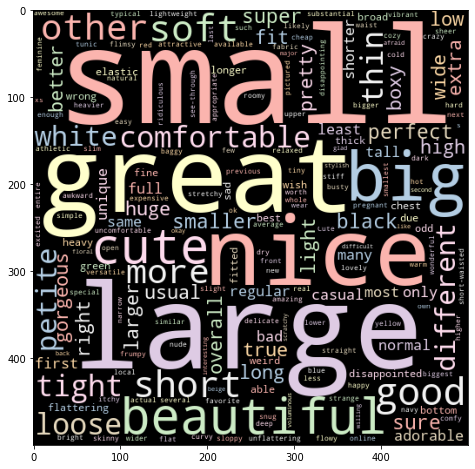

Wordcloud for the Rating and Recommended IND:  4_0


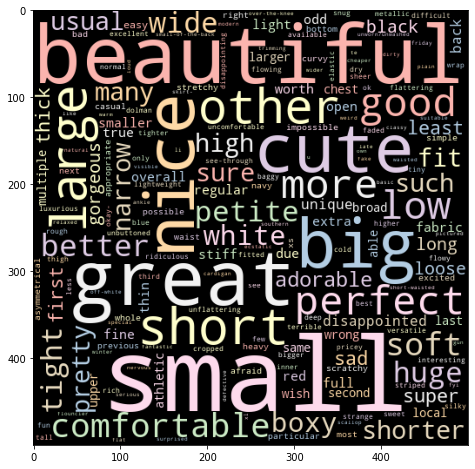

Wordcloud for the Rating and Recommended IND:  4_1


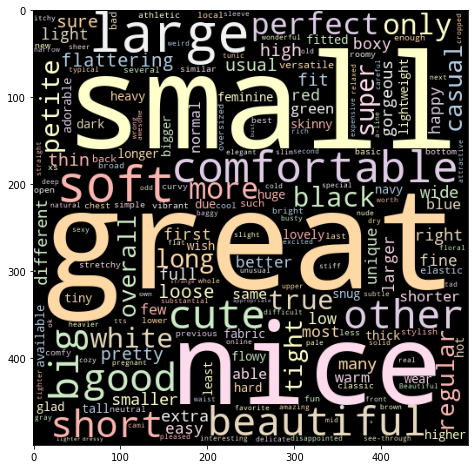

Wordcloud for the Rating and Recommended IND:  5_0


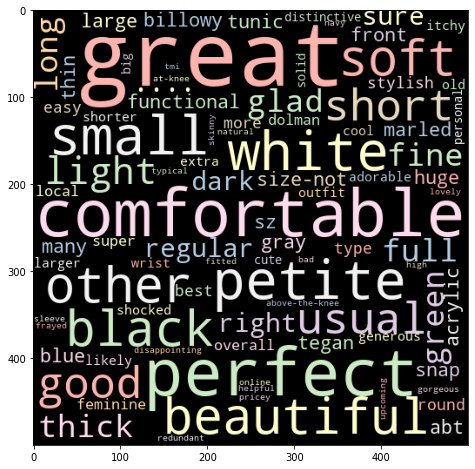

Wordcloud for the Rating and Recommended IND:  5_1


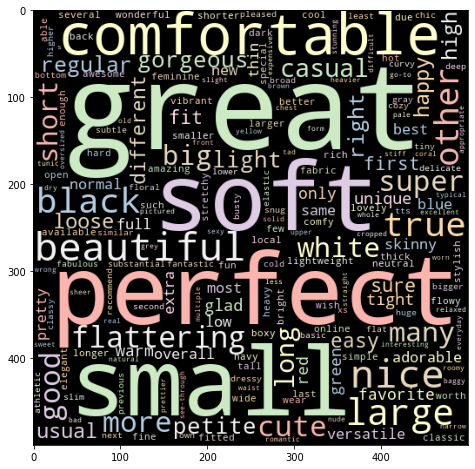

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for idx, dicty in enumerate(ratings_adj):
   print('Wordcloud for the Rating and Recommended IND: ', x_values[idx])
   dicty.pop('i', None)
   dicty.pop('top', None)
   dicty.pop('much', None)
   dicty.pop('little', None)
   wordcloud = WordCloud(width = 500, 
                         height = 500,
                         colormap="Pastel1").generate_from_frequencies(dicty)

   plt.figure(figsize=(10,8))
   plt.imshow(wordcloud)
   plt.show()

### Title

In [77]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

ratings_adj = list()

for i in range(1,6):

  for j in range(2):
    count_words = dict()
    print('----',i,'&',j,'----')
    for review in df[(df['Rating']==i)&(df['Recommended IND']==j)]['Title']:
      review = nltk.word_tokenize(str(review))
      pos_tagged = nltk.pos_tag(review)
      words = filter(lambda x:x[1] in ('JJ','JJR','JJS') ,pos_tagged)
      for word in words:
        word = word[0]
        if word in count_words:
          count_words[word]+=1
        else:
          count_words[word] = 1

    ratings_adj.append(count_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


---- 1 & 0 ----
---- 1 & 1 ----
---- 2 & 0 ----
---- 2 & 1 ----
---- 3 & 0 ----
---- 3 & 1 ----
---- 4 & 0 ----
---- 4 & 1 ----
---- 5 & 0 ----
---- 5 & 1 ----


Wordcloud for the Rating and Recommended IND:  1_0


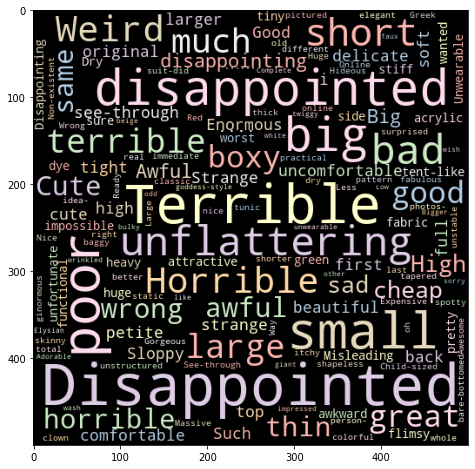

Wordcloud for the Rating and Recommended IND:  1_1


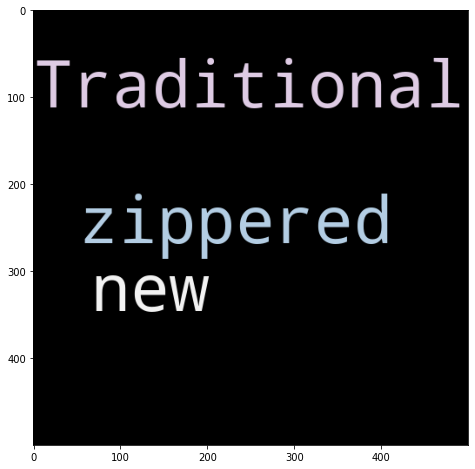

Wordcloud for the Rating and Recommended IND:  2_0


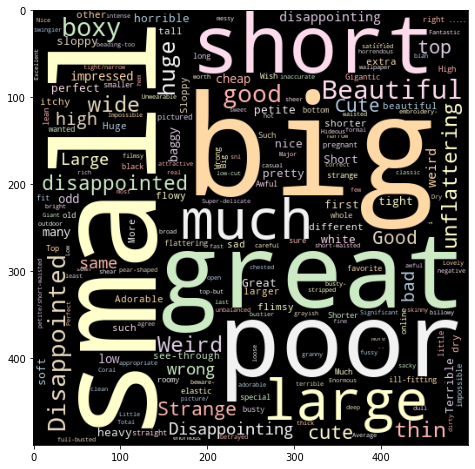

Wordcloud for the Rating and Recommended IND:  2_1


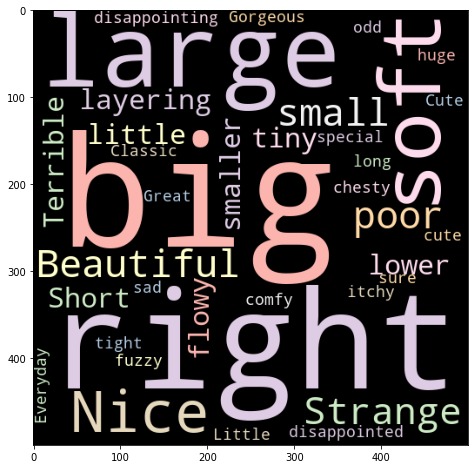

Wordcloud for the Rating and Recommended IND:  3_0


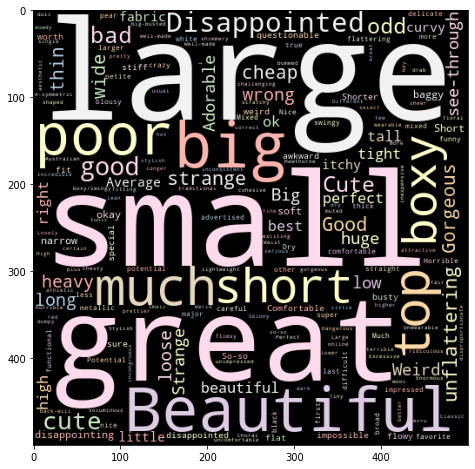

Wordcloud for the Rating and Recommended IND:  3_1


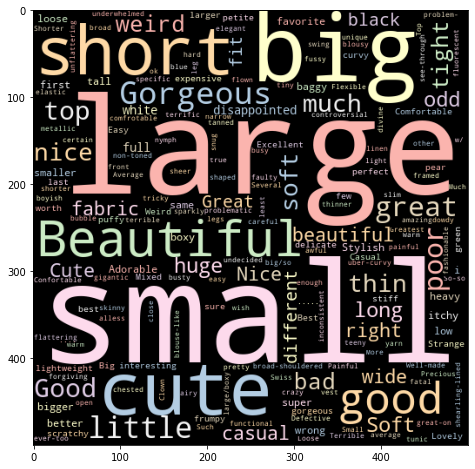

Wordcloud for the Rating and Recommended IND:  4_0


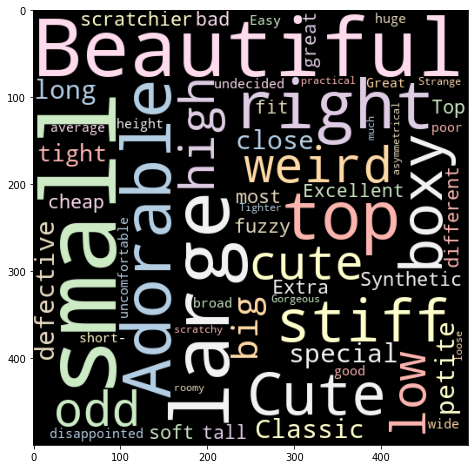

Wordcloud for the Rating and Recommended IND:  4_1


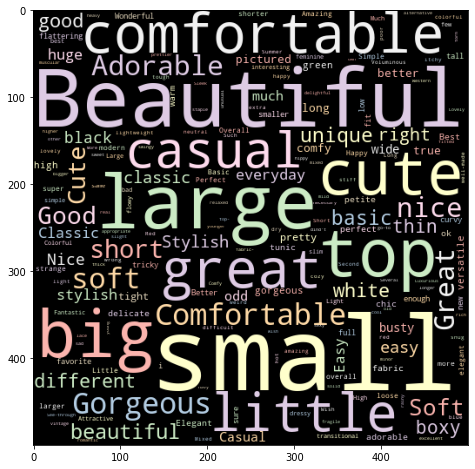

Wordcloud for the Rating and Recommended IND:  5_0


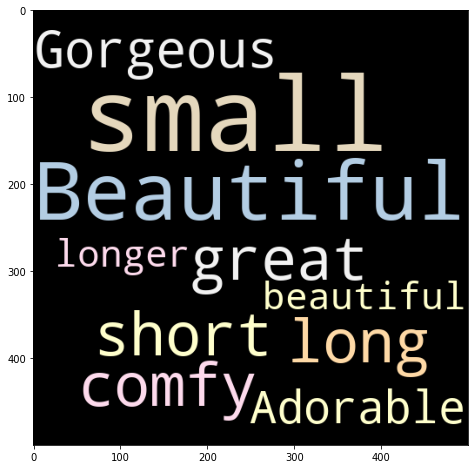

Wordcloud for the Rating and Recommended IND:  5_1


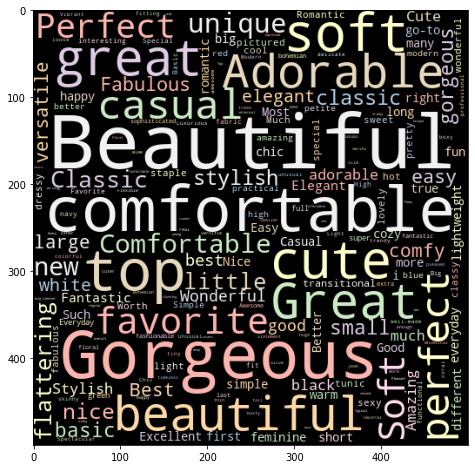

In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for idx, dicty in enumerate(ratings_adj):
   print('Wordcloud for the Rating and Recommended IND: ', x_values[idx])
   wordcloud = WordCloud(width = 500, 
                         height = 500,
                         colormap="Pastel1").generate_from_frequencies(dicty)

   plt.figure(figsize=(10,8))
   plt.imshow(wordcloud)
   plt.show()

# LSTM Setiment analysis

## Text Preprocessing

### Combination of Title and Review Text

In [117]:
# NLTK, for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [118]:
df['Title'] = df['Title'].fillna('')
df['Review Text'] = df['Review Text'].fillna('')
df['Text'] = df['Title']+' '+ df['Review Text']

In [119]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

                                                Text  
0   Absolutely wonderful - silky and sexy and com...  
1   Love this dress!  it's sooo pretty.  i happen...  
2  Some major design flaws I had such high hopes ...  
3  My favorite buy! I love, love, love this jumps...  
4  Flattering shirt This shirt is very flattering...

### Stemming
'Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas"'

In [120]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('works'))
print(stemmer.stem('worked'))

work
work


In [121]:
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer

def preprocess(text):
    words = nltk.word_tokenize(str(text))
    
    pos_tagged = nltk.pos_tag(words)
    words = filter(lambda x:x[1] in ('RBS','RBR','ADV','NNP','RB','NN','JJ','JJR','JJS','VB','VBG','VBD','VBN','VBP','VBZ'), pos_tagged)
    
    # stem only verbs
    words_stemmed = list()
    for word in words:
      if word[1] in ('RBS','RBR','VBD','VBN','VBZ'):
        stemmer = PorterStemmer()
        lemmatizer = WordNetLemmatizer()
        print('before:', word)
        word = lemmatizer.lemmatize(word[0]) if lemmatizer.lemmatize(word[0]).endswith(('e')) else stemmer.stem(word[0])
        print('after:', word)
        words_stemmed.append(word.lower())
      else:
        words_stemmed.append(word[0].lower())

    string = ' '.join(words_stemmed)

    return string

df['Text'] = df['Text'].apply(preprocess)

before: ("'s", 'VBZ')
after: 's
before: ('happened', 'VBD')
after: happen
before: ('did', 'VBD')
after: did
before: ('ordered', 'VBN')
after: order
before: ('bc', 'VBZ')
after: bc
before: ("'s", 'VBZ')
after: 's
before: ('bought', 'VBD')
after: bought
before: ('is', 'VBZ')
after: is
before: ('had', 'VBD')
after: had
before: ('wanted', 'VBD')
after: want
before: ('ordered', 'VBD')
after: order
before: ('found', 'VBD')
after: found
before: ('reordered', 'VBD')
after: reorder
before: ('was', 'VBD')
after: wa
before: ('was', 'VBD')
after: wa
before: ('had', 'VBD')
after: had
before: ('was', 'VBD')
after: wa
before: ('c', 'VBD')
after: c
before: ("'s", 'VBZ')
after: 's
before: ('i', 'VBZ')
after: i
before: ('is', 'VBZ')
after: is
before: ('is', 'VBZ')
after: is
before: ('is', 'VBZ')
after: is
before: ('pairs', 'VBZ')
after: pair
before: ('is', 'VBZ')
after: is
before: ('was', 'VBD')
after: wa
before: ('is', 'VBZ')
after: is
before: ('overwhelmed', 'VBD')
after: overwhelm
before: ('did', 'VB

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
before: ('asked', 'VBN')
after: ask
before: ('got', 'VBD')
after: got
before: ('more', 'RBR')
after: more
before: ('scoured', 'VBD')
after: scour
before: ('mentioned', 'VBD')
after: mention
before: ('got', 'VBD')
after: got
before: ('awaited', 'VBN')
after: await
before: ('is', 'VBZ')
after: is
before: ('suggested', 'VBD')
after: suggest
before: ('was', 'VBD')
after: wa
before: ('designed', 'VBN')
after: design
before: ("'s", 'VBZ')
after: 's
before: ('seems', 'VBZ')
after: seem
before: ('tried', 'VBD')
after: tri
before: ('was', 'VBD')
after: wa
before: ('online', 'VBZ')
after: online
before: ('returned', 'VBD')
after: return
before: ('tried', 'VBD')
after: tri
before: ('is', 'VBZ')
after: is
before: ('lars', 'VBZ')
after: lar
before: ('fits', 'VBZ')
after: fit
before: ('is', 'VBZ')
after: is
before: ('is', 'VBZ')
after: is
before: ('was', 'VBD')
after: wa
before: ('got', 'VBD')
after: got
before: ('got', 'VBD')
after:

In [122]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

                                                Text  
0        absolutely wonderful silky sexy comfortable  
1  love dress 's sooo pretty i happen find store ...  
2  major design flaws had such high dress really ...  
3  favorite buy love love love jumpsuit 's fun fl...  
4  flattering shirt shirt is very flattering due ...

In [123]:
df.drop(df[df['Text'] == ''].index, inplace=True)
#df.drop(df[df['Text'].isna()].index, inplace=True)

In [124]:
len(df)

22642

### Train Test split

In [125]:
# sklearn, for preprocessing & scoring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [126]:
y= df['Recommended IND']
X = df.drop('Recommended IND',axis=1)

# split by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X['Text'], y, test_size=0.3, random_state = 8888) 

In [127]:
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

In [128]:
max_len

398

### Word Embedding with GloVe

In order to use text as input for a model, we need all the text data to have equal length. For this we have:  tensorflow.keras.preprocessing.sequence.pad_sequences. We take the max_len as the parameter, so that all of the texts will have the same length. This means, empty spaces will be filled with 0.

> OOV means 'out of vocabulary'


In [129]:
# tensorflow, for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout
import numpy as np


In [130]:
# for tokenization
def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

In [131]:
tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

In [132]:
# https://nlp.stanford.edu/projects/glove/
GLOVE_FILE = './glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

In [133]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:10])

How many missed words?  1776
As example:  ['<OOV>', 'receiv', 'decid', 'pictur', 'arriv', 'xxs', 'pilcro', 'surpris', 'excit', 'worri']


### LSTM Model

Find out what LSTM is: https://intellipaat.com/blog/what-is-lstm/

https://www.youtube.com/watch?v=LfnrRPFhkuY

In [134]:
def LSTM_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    model.add(Dropout(0.3))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['AUC']) 
    return model

#### Train model

In [135]:
# fitting
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 128, validation_data=(test_X, test_y))

Epoch 1/60
124/124 [==============================] - 179s 1s/step - loss: 0.7878 - auc: 0.5348 - val_loss: 0.6887 - val_auc: 0.7535
Epoch 2/60
124/124 [==============================] - 169s 1s/step - loss: 0.6848 - auc: 0.6485 - val_loss: 0.6115 - val_auc: 0.8103
Epoch 3/60
124/124 [==============================] - 172s 1s/step - loss: 0.5969 - auc: 0.7694 - val_loss: 0.5568 - val_auc: 0.8529
Epoch 4/60
124/124 [==============================] - 171s 1s/step - loss: 0.5329 - auc: 0.8265 - val_loss: 0.4936 - val_auc: 0.8683
Epoch 5/60
124/124 [==============================] - 165s 1s/step - loss: 0.4990 - auc: 0.8427 - val_loss: 0.4589 - val_auc: 0.8726
Epoch 6/60
124/124 [==============================] - 172s 1s/step - loss: 0.4680 - auc: 0.8588 - val_loss: 0.4297 - val_auc: 0.8796
Epoch 7/60
124/124 [==============================] - 173s 1s/step - loss: 0.4475 - auc: 0.8636 - val_loss: 0.4117 - val_auc: 0.8846
Epoch 8/60
124/124 [==============================] - 167s 1s/step - 

In [136]:
# test probability
test_predict_proba = model.predict(test_X, verbose=0)
# test predicted label
test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(test_y, test_prediction_label)
precision = precision_score(test_y, test_prediction_label)
recall = recall_score(test_y, test_prediction_label)
f1 = f1_score(test_y, test_prediction_label)
AUC = roc_auc_score(test_y, test_predict_proba)

# get list of test scores
test_score_list = [accuracy, precision, recall, f1, AUC]

213/213 [==============================] - 23s 106ms/step


#### Test model

In [137]:
# test probability
train_predict_proba = model.predict(train_X, verbose=0)
# test predicted label
train_prediction_label = (model.predict(train_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(train_y, train_prediction_label)
precision = precision_score(train_y, train_prediction_label)
recall = recall_score(train_y, train_prediction_label)
f1 = f1_score(train_y, train_prediction_label)
AUC = roc_auc_score(train_y, train_predict_proba)

# get list of train scores
train_score_list = [accuracy, precision, recall, f1, AUC]

496/496 [==============================] - 55s 110ms/step


In [138]:
import plotly.graph_objects as go

score_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
fig = go.Figure(data=[
    go.Bar(name='Train Scores', 
           x=score_name, y=train_score_list,
           text=np.round(train_score_list,3),marker_color='#67001f'),
    go.Bar(name='Test Scores', 
           x=score_name, y=test_score_list,
           text=np.round(test_score_list,3),marker_color='#fddbc7')
])
fig.update_layout(template = 'simple_white', title = 'Comparison of Train Scores & Test Scores')

fig.update_layout(
    xaxis_title="scoring metrix",
    yaxis_title="score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()